<a href="https://colab.research.google.com/github/SindhuSobhan/DeepLearn/blob/CNN/CNN/Produced/Others/Autoencoder_Keras_%5BSimplified%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autoencoder
A simple yet accurate autoencoder model for MNIST dataset. A means for reducing features.

##Import Libraries

In [1]:
import tensorflow as tf

if int(tf.__version__[0]) < 2:
  !pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 450kB 40.5MB/s 
     |████████████████████████████████| 3.9MB 57.3MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import fashion_mnist, mnist
import matplotlib.pyplot as plt

##MNIST


###Training

In [0]:
#Define Models
def create_Dense_model( encoding_dim = 32):
  Inp = Input(shape = (784,), name = "Input_Layer")
  x = Dense(encoding_dim, activation = 'relu', name = 'Encoding_Layer')(Inp)
  Out = Dense(784, activation = 'sigmoid', name = 'Decoding_Layer')(x)

  return Model(Inp, Out)




def create_CNN_model(encoding_dim = 8):
  Inp = Input(shape = (28,28, 1), name = "Input_Layer")

  x = Conv2D(16, (3,3), padding = 'same', activation = "relu", name = "Conv_Enc_1")(Inp)
  x = MaxPool2D((2,2), name = "MaxPool_1")(x)
  x = Conv2D(8, (3,3), padding = 'same', activation = "relu", name = "Conv_Enc_2")(x)
  x = MaxPool2D((2,2), name = "MaxPool_2")(x) 
  x = Conv2D(encoding_dim, (3,3), padding = "same", activation = "relu", name = "Conv_Enc_3")(x)
  x = MaxPool2D((2,2), padding = "same",  name = "Encoder_Output")(x) 

  x = Conv2D(encoding_dim, (3,3), padding = "same", activation = "relu", name = "Conv_Dec_1")(x)
  x = UpSampling2D((2,2), name = "Upsample_1")(x)
  x = Conv2D(8, (3,3), padding = "same", activation = "relu",  name = "Conv_Dec_2")(x)
  x = UpSampling2D((2,2), name = "Upsample_2")(x)
  x = Conv2D(16, (3,3), activation = "relu",  name = "Conv_Dec_3")(x)
  x = UpSampling2D((2,2), name = "Upsample_3")(x)

  Out = Conv2D(1, (3,3), padding = "same", activation = "sigmoid",  name = "Decoded_Output")(x)

  return Model(Inp, Out)

In [44]:
#@title Choose a model to train { run: "auto", vertical-output: true }

Model_type = "CNN" #@param ["Dense model", "CNN"]

if Model_type == "Dense model":
  (x_train, _), (x_test, _) = mnist.load_data()
  x_train = x_train.astype('float32').reshape(60000, 784) / 255.0
  x_test = x_test.astype('float32').reshape(10000, 784) / 255.0

  model_dense = create_Dense_model(encoding_dim = 32)

  model_dense.summary()

  model_dense.compile(optimizer = 'adam', loss = 'binary_crossentropy')
  History = model_dense.fit(x_train,
                    x_train,
                    batch_size = 64,
                    epochs = 30,
                    verbose = 1)

else:
  (x_train, _ ), (x_test, _ ) = mnist.load_data()
  x_train = x_train.astype('float32').reshape(60000, 28, 28, 1) / 255.0
  x_test = x_test.astype('float32').reshape(10000, 28, 28, 1) / 255.0  

  model_cnn = create_CNN_model(encoding_dim = 8)

  model_cnn.summary()

  model_cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy')
  History = model_cnn.fit(x_train,
                    x_train,
                    batch_size = 64,
                    epochs = 30,
                    verbose = 1)



Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
Conv_Enc_1 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (None, 14, 14, 16)        0         
_________________________________________________________________
Conv_Enc_2 (Conv2D)          (None, 14, 14, 8)         1160      
_________________________________________________________________
MaxPool_2 (MaxPooling2D)     (None, 7, 7, 8)           0         
_________________________________________________________________
Conv_Enc_3 (Conv2D)          (None, 7, 7, 8)           584       
_________________________________________________________________
Encoder_Output (MaxPooling2D (None, 4, 4, 8)           0  

###Plotting

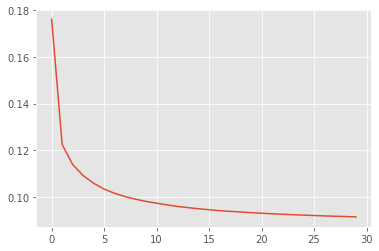

In [45]:
plt.style.use('ggplot')
plt.plot(History.epoch, History.history['loss'])

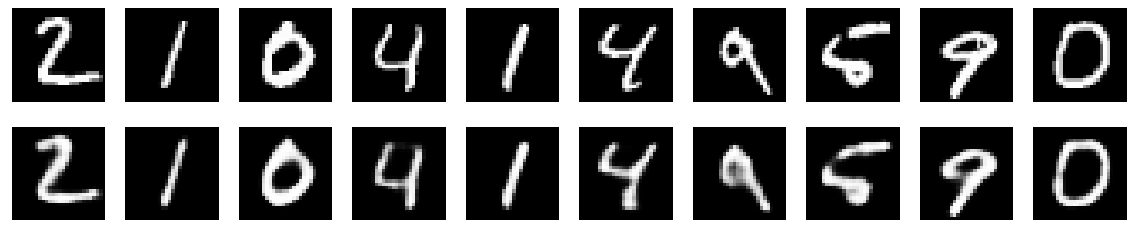

In [46]:
# From https://blog.keras.io/building-autoencoders-in-keras.html

if Model_type == "Dense model":
  model = model_dense
else:
  model= model_cnn

decoded_imgs = model.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##FMNIST

###Training

In [0]:
#Define Models
def create_Dense_model( encoding_dim = 64):
  Inp = Input(shape = (784,), name = "Input_Layer")
  x = Dense(encoding_dim, activation = 'relu', name = 'Encoding_Layer')(Inp)
  Out = Dense(784, activation = 'sigmoid', name = 'Decoding_Layer')(x)

  return Model(Inp, Out)




def create_CNN_model(encoding_dim = 8):
  Inp = Input(shape = (28,28, 1), name = "Input_Layer")

  x = Conv2D(64, (3,3), padding = 'same', activation = "relu", name = "Conv_Enc_1")(Inp)
  x = MaxPool2D((2,2), name = "MaxPool_1")(x)
  x = Conv2D(32, (3,3), padding = 'same', activation = "relu", name = "Conv_Enc_2")(x)
  x = MaxPool2D((2,2), name = "MaxPool_2")(x) 
  x = Conv2D(encoding_dim, (3,3), padding = "same", activation = "relu", name = "Conv_Enc_3")(x)
  x = MaxPool2D((2,2), padding = "same",  name = "Encoder_Output")(x) 

  x = Conv2D(encoding_dim, (3,3), padding = "same", activation = "relu", name = "Conv_Dec_1")(x)
  x = UpSampling2D((2,2), name = "Upsample_1")(x)
  x = Conv2D(32, (3,3), padding = "same", activation = "relu",  name = "Conv_Dec_2")(x)
  x = UpSampling2D((2,2), name = "Upsample_2")(x)
  x = Conv2D(64, (3,3), activation = "relu",  name = "Conv_Dec_3")(x)
  x = UpSampling2D((2,2), name = "Upsample_3")(x)

  Out = Conv2D(1, (3,3), padding = "same", activation = "sigmoid",  name = "Decoded_Output")(x)

  return Model(Inp, Out)

In [69]:
#@title Choose a model to train { run: "auto", vertical-output: true }

Model_type = "CNN" #@param ["Dense model", "CNN"]

if Model_type == "Dense model":
  (x_train, _), (x_test, _) = fashion_mnist.load_data()
  x_train = x_train.astype('float32').reshape(60000, 784) / 255.0
  x_test = x_test.astype('float32').reshape(10000, 784) / 255.0

  model_dense = create_Dense_model(encoding_dim = 64)

  model_dense.summary()

  model_dense.compile(optimizer = 'adam', loss = 'binary_crossentropy')
  History = model_dense.fit(x_train,
                    x_train,
                    batch_size = 32,
                    epochs = 50,
                    verbose = 1)

else:
  (x_train, _ ), (x_test, _ ) = fashion_mnist.load_data()
  x_train = x_train.astype('float32').reshape(60000, 28, 28, 1) / 255.0
  x_test = x_test.astype('float32').reshape(10000, 28, 28, 1) / 255.0  

  model_cnn = create_CNN_model(encoding_dim = 16)

  model_cnn.summary()

  model_cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy')
  History = model_cnn.fit(x_train,
                    x_train,
                    batch_size = 32,
                    epochs = 50,
                    verbose = 1)



Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
Conv_Enc_1 (Conv2D)          (None, 28, 28, 64)        640       
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (None, 14, 14, 64)        0         
_________________________________________________________________
Conv_Enc_2 (Conv2D)          (None, 14, 14, 32)        18464     
_________________________________________________________________
MaxPool_2 (MaxPooling2D)     (None, 7, 7, 32)          0         
_________________________________________________________________
Conv_Enc_3 (Conv2D)          (None, 7, 7, 16)          4624      
_________________________________________________________________
Encoder_Output (MaxPooling2D (None, 4, 4, 16)          0  

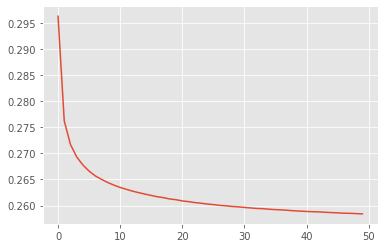

In [70]:
plt.style.use('ggplot')
plt.plot(History.epoch, History.history['loss'])

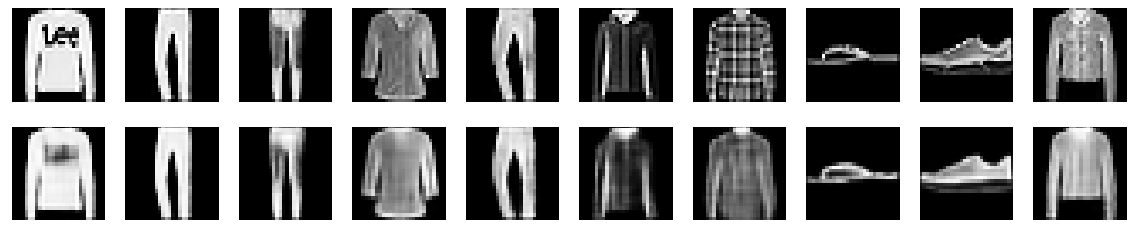

In [71]:
# From https://blog.keras.io/building-autoencoders-in-keras.html

if Model_type == "Dense model":
  model = model_dense
else:
  model= model_cnn

decoded_imgs = model.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()